In [172]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [173]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Read the dataset

# Save it into a dataframe called "leads"
leads = pd.read_csv("Leads.csv")

In [175]:
# Look at the first few entries

# head
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [176]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [177]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

As you can see, the feature variables are quite intuitive. If you don't understand them completely, please refer to the data dictionary.

In [178]:
# Check the summary of the dataset

leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [179]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

##EDA:


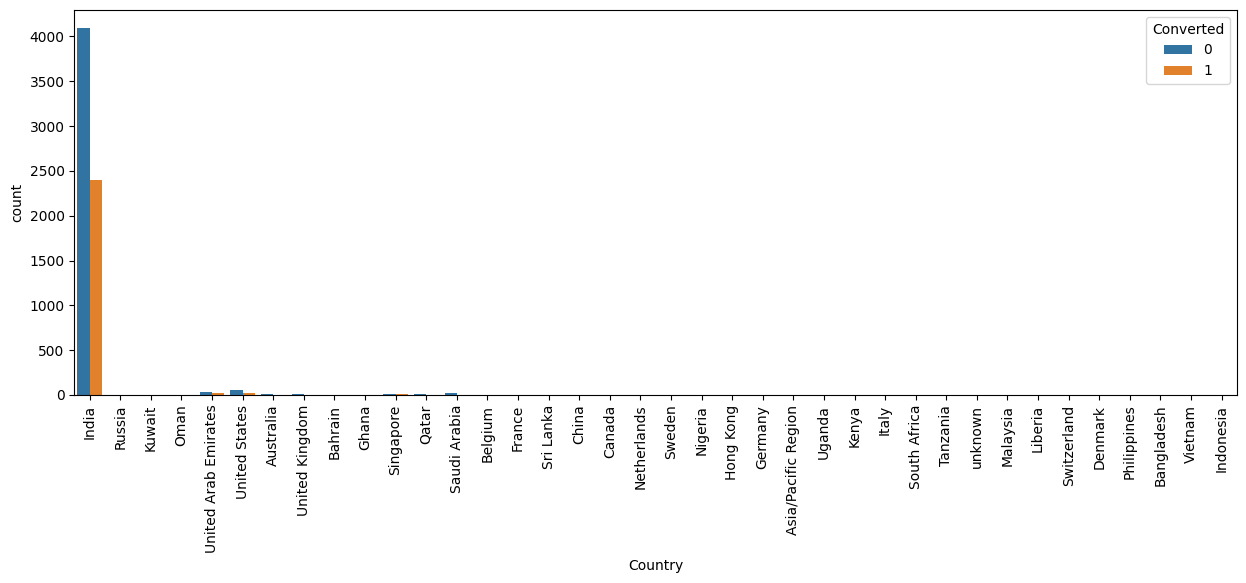

In [180]:
#plotting spread of Country columnn
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Country', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

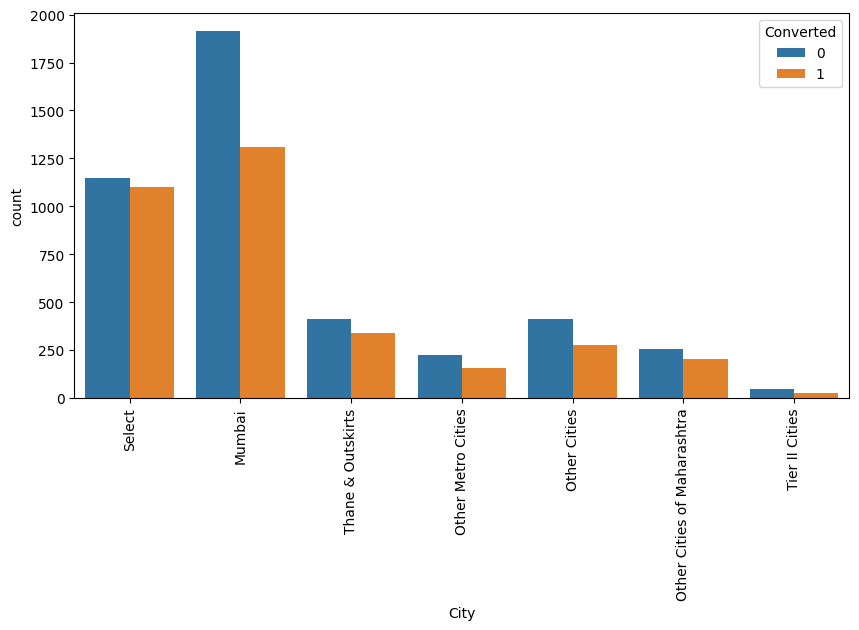

In [181]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(x='City', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

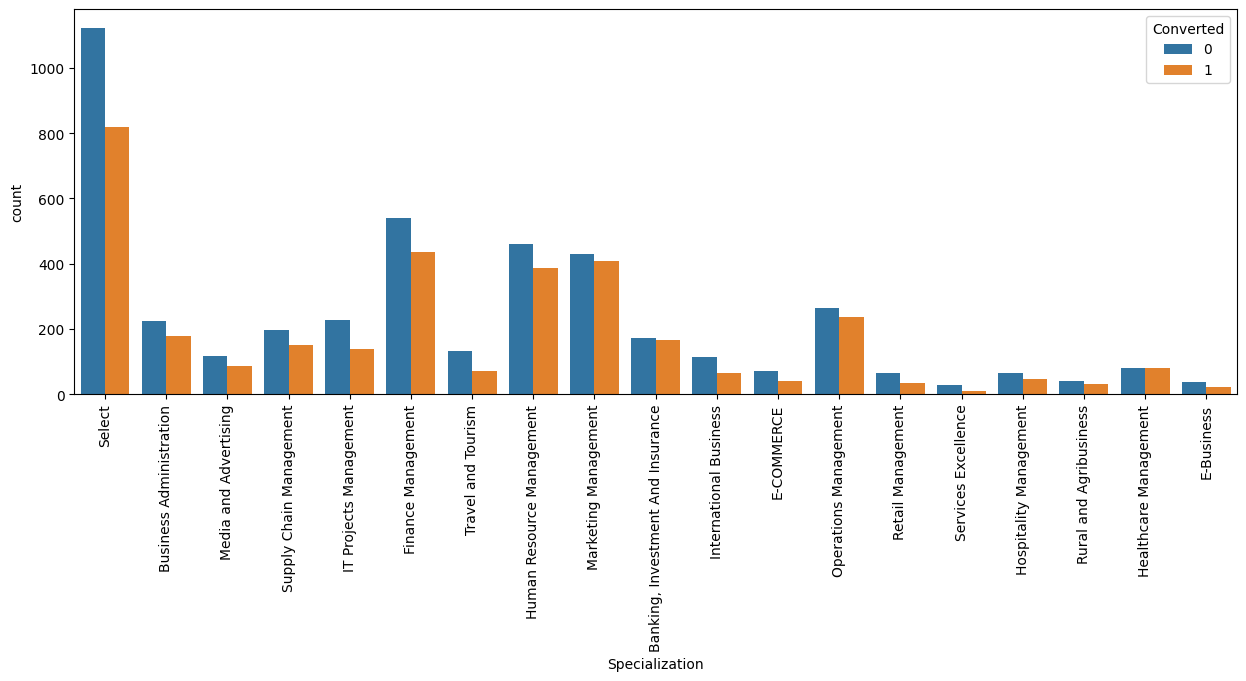

In [182]:
#plotting spread of Specialization columnn

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Specialization', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

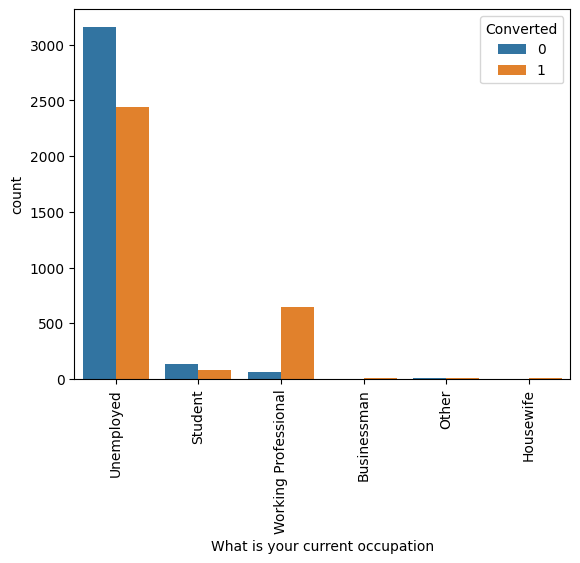

In [183]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(x='What is your current occupation', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

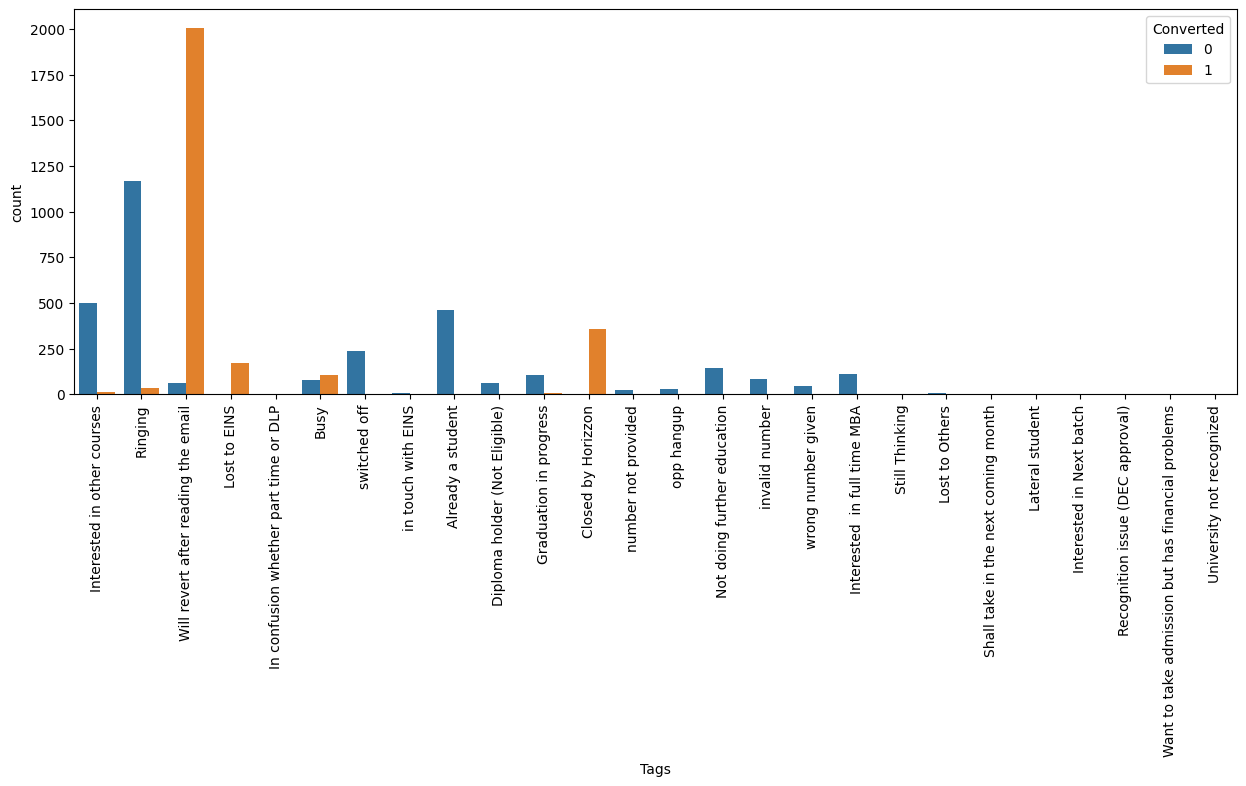

In [184]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
s1=sns.countplot(x='Tags', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

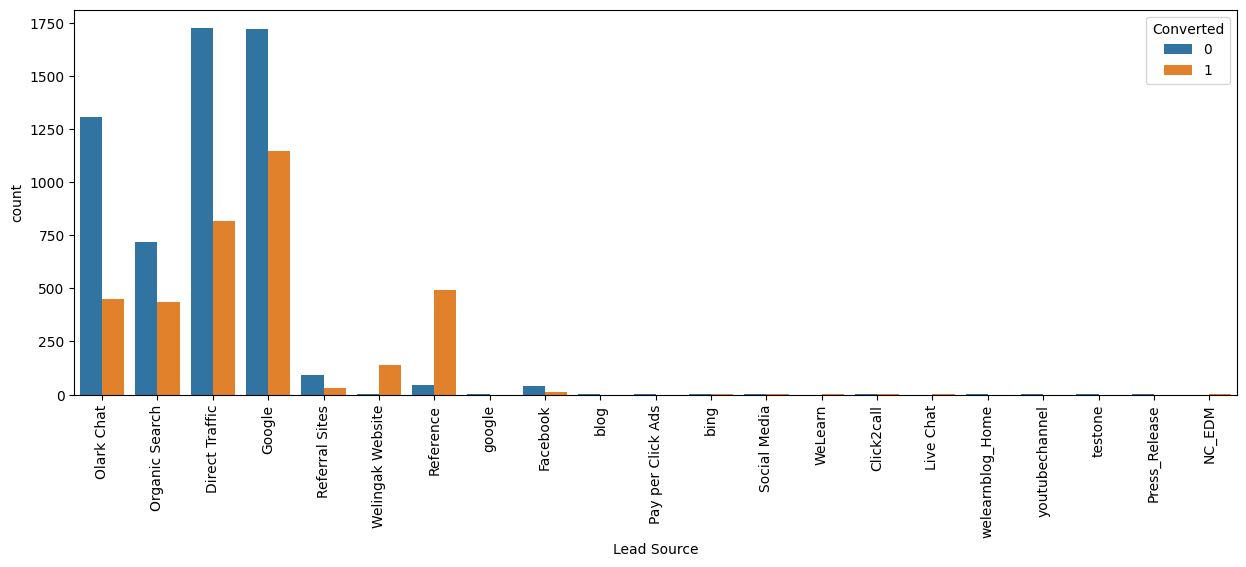

In [185]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Lead Source', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

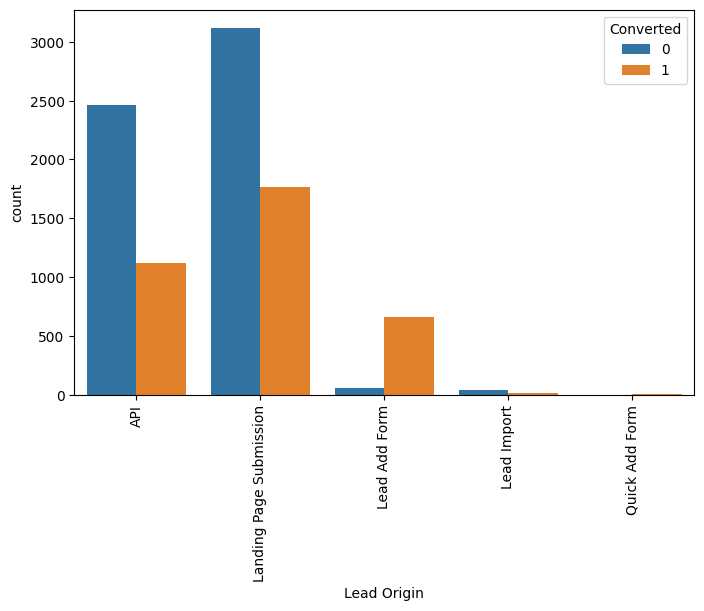

In [186]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
s1=sns.countplot(x='Lead Origin', hue='Converted', data=leads)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

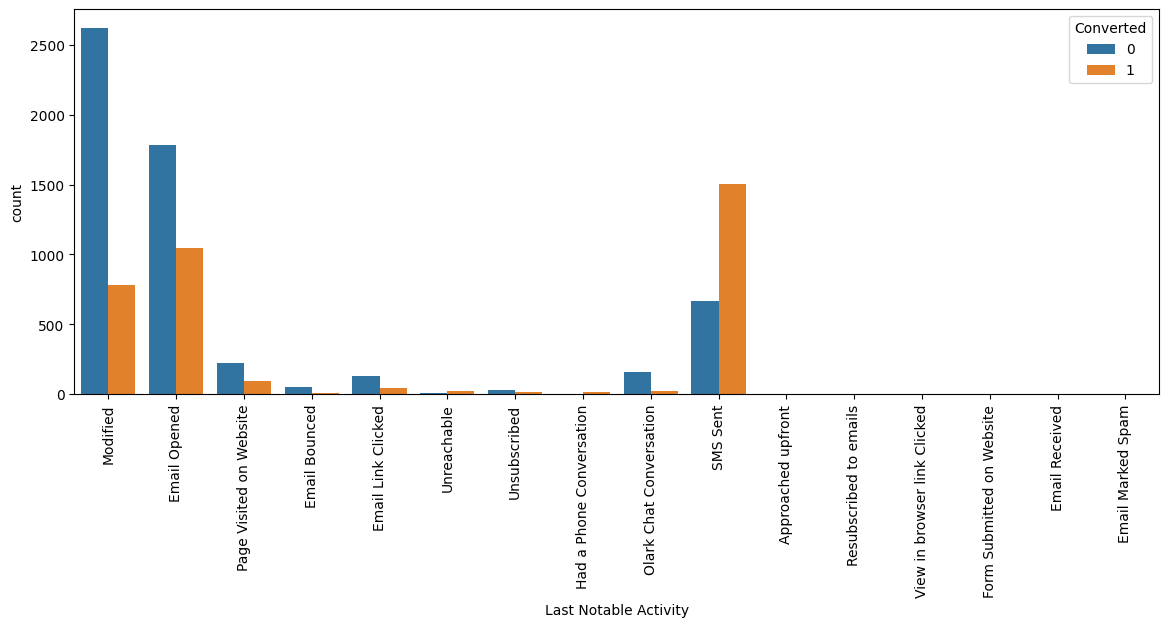

In [187]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

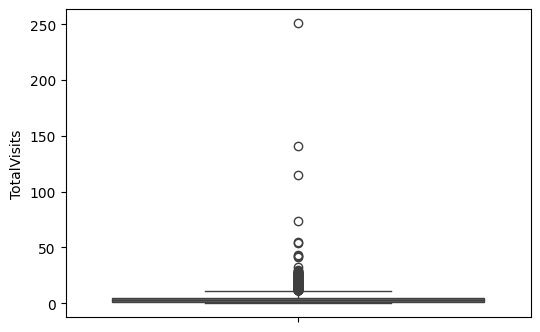

In [188]:
#Total Visits
#visualizing spread of variable and outlier

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

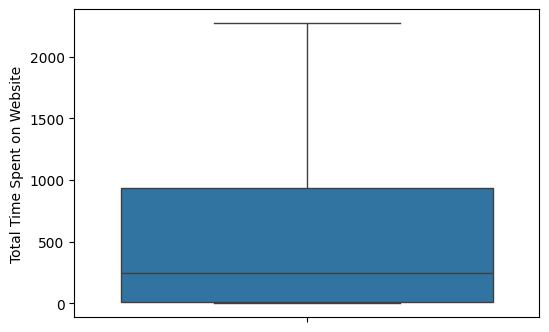

In [189]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

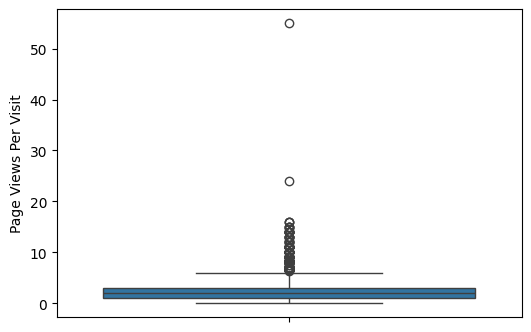

In [190]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

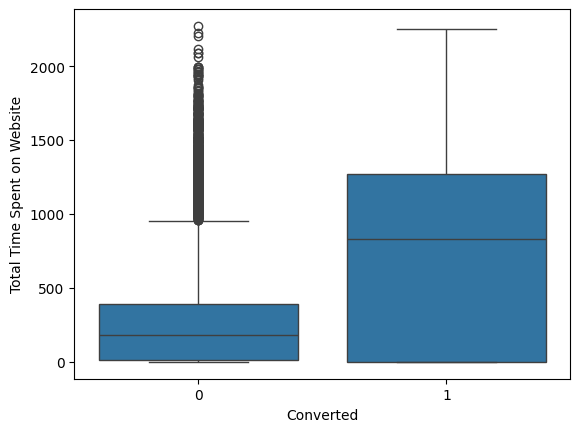

In [191]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

## Step 1: Data Cleaning and Preparation

In [192]:
# Check the number of missing values in each column

leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
A free copy of Mastering The Interview              0
Prospect ID                                         0
Newspaper Article                                   0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Lead Number                                         0
Magazine                                            0
Search                                              0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Origin                                         0
Last Notable Activity                               0
dtype: int64

In [193]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
A free copy of Mastering The Interview            0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Lead Number                                       0.00
Magazine                                          0.00
Search                                            0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: float64

As you can see there are a lot of columns which have high number of missing values. Clearly, these columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [194]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, axis=1, inplace=True)

In [195]:
# Check the number of null values again
leads.isnull().sum().sort_values(ascending=False)
# same as 9

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Prospect ID                                         0
X Education Forums                                  0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
Lead Number                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Origin                                         0
Last Notable Activity                               0
dtype: int64

In [196]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Newspaper                                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Prospect ID                                       0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: float64

As you might be able to interpret, the variable `City` won't be of any use in our analysis. So it's best that we drop it.

In [197]:
# drop City
leads.drop('City', axis=1, inplace=True)

In [198]:
# Same goes for the variable 'Country'

# drop Country
leads.drop('Country', axis=1, inplace=True)

In [199]:
# Let's now check the percentage of missing values in each column
# (60/200) * 100 = 30.0

round(((leads.isnull().sum()/len(leads.index))*100), 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
How did you hear about X Education               23.89
Specialization                                   15.56
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Origin                                       0.00
Last Notable Activity                             0.00
dtype: float64

In [200]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                                         0
Newspaper Article                                   0
Magazine                                            0
Search                                              0
Lead Number                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                                         0
Do Not Email                                        0
Lead Origin                                         0
Last Notable Activity                               0
dtype: int64

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [201]:
# Get the value counts of all the columns

for col in leads.columns:
    print(leads[col].astype('category').value_counts())
    print('-'*50)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
--

The following three columns now have the level 'Select'. Let's check them once again.

In [202]:
# apply v_c() on Lead Profile col
leads['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [203]:
leads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [204]:
leads['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

Clearly the levels `Lead Profile` and `How did you hear about X Education` have a lot of rows which have the value `Select` which is of no use to the analysis so it's best that we drop them.

In [205]:
# drop Lead Profile and How did you hear about X Education cols
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis=1, inplace=True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include `Do Not Call`, `Search`, `Magazine`, `Newspaper Article`, `X Education Forums`, `Newspaper`, `Digital Advertisement`, `Through Recommendations`, `Receive More Updates About Our Courses`, `Update me on Supply Chain Content`, `Get updates on DM Content`, `I agree to pay the amount through cheque`. Since practically all of the values for these variables are `No`, it's best that we drop these columns as they won't help with our analysis.

In [206]:
# drop all of the above mentioned columns
cols_to_drop = ['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']
leads.drop(cols_to_drop, axis=1, inplace=True)


Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [207]:
leads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [208]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'
leads = leads[~pd.isnull(leads['What matters most to you in choosing a course'])]


In [209]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                      130
Page Views Per Visit                             130
Last Activity                                    103
Lead Source                                       36
Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Do Not Email                                       0
Converted                                          0
Total Time Spent on Website                        0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

In [210]:
leads.shape

(6531, 15)

Now, there's the column `What is your current occupation` which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column `What is you current occupation`.

In [211]:
#leads = leads[~pd.isnull(leads['What matters most to you in choosing a course'])]

print(leads['Specialization'].value_counts())
print(leads['Specialization'].isnull().sum())

Specialization
Select                               1929
Finance Management                    762
Marketing Management                  678
Human Resource Management             676
Operations Management                 395
Business Administration               314
Supply Chain Management               278
IT Projects Management                278
Banking, Investment And Insurance     269
Media and Advertising                 162
Travel and Tourism                    150
International Business                138
Healthcare Management                 125
Hospitality Management                 93
E-COMMERCE                             81
Retail Management                      78
Rural and Agribusiness                 57
E-Business                             43
Services Excellence                    25
Name: count, dtype: int64
0


In [212]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

TotalVisits                                      130
Page Views Per Visit                             130
Last Activity                                    103
Lead Source                                       36
Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Do Not Email                                       0
Converted                                          0
Total Time Spent on Website                        0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
A free copy of Mastering The Interview             0
Last Notable Activity                              0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [213]:
# Drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]

In [214]:
# Check the null values again

leads.isnull().sum().sort_values(ascending=False)

Lead Source                                      29
Prospect ID                                       0
Lead Number                                       0
Lead Origin                                       0
Do Not Email                                      0
Converted                                         0
TotalVisits                                       0
Total Time Spent on Website                       0
Page Views Per Visit                              0
Last Activity                                     0
Specialization                                    0
What is your current occupation                   0
What matters most to you in choosing a course     0
A free copy of Mastering The Interview            0
Last Notable Activity                             0
dtype: int64

In [215]:
# Drop the null values rows in the column 'Lead Source'

leads = leads[~pd.isnull(leads['Lead Source'])]

In [216]:
# Check the number of null values again

leads.isnull().sum().sort_values(ascending=False)

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
A free copy of Mastering The Interview           0
Last Notable Activity                            0
dtype: int64

In [217]:
# Drop the null values rows in the column 'Specialization'
#leads = leads[~pd.isnull(leads['Specialization'])]

In [218]:
# Check the number of null values again

#leads.isnull().sum().sort_values(ascending=False)

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [219]:
print(len(leads.index))
print(len(leads.index)/9240)

6372
0.6896103896103896


We still have around 69% of the rows which seems good enough.

In [220]:
# Let's look at the dataset again

leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email  Converted  TotalVisits  \
0      Olark Chat           No          0          0.0   
1  Organic Search           No          0          5.0   
2  Direct Traffic           No          1          2.0   
3  Direct Traffic           No          0          1.0   
4          Google           No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0                   Select                      Unemployed   
1                   Select                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4                   Select                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [221]:
# Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis,
# so it's best that we drop these two variables.
leads.drop(['Prospect ID', 'Lead Number', 'What matters most to you in choosing a course'], axis=1, inplace=True)

In [222]:
leads.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Select   
1             Email Opened                   Select   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Select   

  What is your current occupation A free copy of Mastering The Interview  \
0                      Unemployed                                     No   
1                      Unemployed                                     No   
2                         Student                                    Yes   
3                      Unemployed                                     No   
4                      Unemployed                                     No   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [223]:
# Specialization => {Select, MBA, BE}
# Specialization_Select, Specialization_MBA, Specialization_BE
# Drop Specialization_Select

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [224]:
# Check the columns which are of type 'object'

temp = leads.select_dtypes(include=['object'])
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [225]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True,dtype=int)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [226]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select'
# which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'],prefix='Specialization',dtype=int)
dummy_spl = dummy_spl.drop(['Specialization_Select'], axis=1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [227]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [228]:
# Let's take a look at the dataset again

leads.head()

Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  ...  Specialization_IT Projects Management  \
0                   0  ...                                      0   
1                   0  ...                                      0   
2                   0  ...                                      0   
3                   0  ...                                      0   
4                   1  ...                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                                  0  
4                                  0  

[5 rows x 75 columns]

### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [229]:
# Import the required library

from sklearn.model_selection import train_test_split

In [230]:
# Put all the feature variables in X

X = leads.drop(['Converted'], axis=1)
X.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  ...  \
0                   0                      0  ...   
1                   0                      0  ...   
2                   0                      0  ...   
3                   0                      0  ...   
4                   1                      0  ...   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  
0                                  0  
1                                  0  
2                                  0  
3                     

In [231]:
# Put the target variable in y

y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [232]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [233]:
# Import Standard scaler

from sklearn.preprocessing import StandardScaler

In [234]:
# Scale the three numeric features present in the dataset - 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'


scaler = StandardScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                            'Total Time Spent on Website', 'Page Views Per Visit']])
X_train.head()


TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
4170     0.065399                     0.701078              0.731572   
6812     2.347130                     1.228050             -0.229986   
7717    -0.695177                    -0.947262             -1.191544   
207      0.255544                    -0.312057              1.212351   
2044    -0.314889                    -0.288991             -0.229986   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4170                                    1                          0   
6812                                    1                          0   
7717                                    0                          0   
207                                     0                          0   
2044                                    0                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4170                        0                           1   
6812                        0                           1   
7717                        0                           0   
207                         0                           0   
2044                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
4170                     0                   0                      0  ...   
6812                     0                   0                      0  ...   
7717                     0                   0                      0  ...   
207                      0                   0                      0  ...   
2044                     0                   1                      0  ...   

      Specialization_IT Projects Management  \
4170                                      1   
6812                                      0   
7717                                      0   
207                                       0   
2044                                      0   

      Specialization_International Business  \
4170                                      0   
6812                                      0   
7717                                      0   
207                                       0   
2044                                      0   

      Specialization_Marketing Management  \
4170                                    0   
6812                                    0   
7717                                    0   
207                                     0   
2044                                    0   

      Specialization_Media and Advertising  \
4170                                     0   
6812                                     0   
7717                                     0   
207                                      0   
2044                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
4170                                     0                                 0   
6812                                     0                                 0   
7717                                     0                                 0   
207                                      0                                 0   
2044                                     0                                 0   

      Specialization_Rural and Agribusiness  \
4170                                      0   
6812                                      0   
7717                                      0   
207                                       0   
2044                                      0   

      Specialization_Services Excellence  \
4170                                   0   
6812                                   0   
7717                                   0   
207                                    0   
2044                                   0   

      Specialization_Supply Chain Management  \
4170                                       0   
6812                                       1   
7717             

### Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

In [235]:
# Looking at the correlation table
leads.corr()

Converted  TotalVisits  \
Converted                                1.000000     0.009349   
TotalVisits                              0.009349     1.000000   
Total Time Spent on Website              0.313277     0.212987   
Page Views Per Visit                    -0.063002     0.499610   
Lead Origin_Landing Page Submission     -0.117447     0.275695   
...                                           ...          ...   
Specialization_Retail Management        -0.018621     0.015201   
Specialization_Rural and Agribusiness    0.008615     0.033466   
Specialization_Services Excellence      -0.005151     0.015953   
Specialization_Supply Chain Management   0.005753     0.066717   
Specialization_Travel and Tourism       -0.011786     0.067551   

                                        Total Time Spent on Website  \
Converted                                                  0.313277   
TotalVisits                                                0.212987   
Total Time Spent on Website                                1.000000   
Page Views Per Visit                                       0.304302   
Lead Origin_Landing Page Submission                        0.275715   
...                                                             ...   
Specialization_Retail Management                           0.024909   
Specialization_Rural and Agribusiness                      0.019948   
Specialization_Services Excellence                         0.003197   
Specialization_Supply Chain Management                     0.045367   
Specialization_Travel and Tourism                          0.037854   

                                        Page Views Per Visit  \
Converted                                          -0.063002   
TotalVisits                                         0.499610   
Total Time Spent on Website                         0.304302   
Page Views Per Visit                                1.000000   
Lead Origin_Landing Page Submission                 0.458085   
...                                                      ...   
Specialization_Retail Management                    0.026159   
Specialization_Rural and Agribusiness               0.023349   
Specialization_Services Excellence                  0.015264   
Specialization_Supply Chain Management              0.053089   
Specialization_Travel and Tourism                   0.111409   

                                        Lead Origin_Landing Page Submission  \
Converted                                                         -0.117447   
TotalVisits                                                        0.275695   
Total Time Spent on Website                                        0.275715   
Page Views Per Visit                                               0.458085   
Lead Origin_Landing Page Submission                                1.000000   
...                                                                     ...   
Specialization_Retail Management                                   0.071003   
Specialization_Rural and Agribusiness                              0.049075   
Specialization_Services Excellence                                 0.039444   
Specialization_Supply Chain Management                             0.111646   
Specialization_Travel and Tourism                                  0.094902   

                                        Lead Origin_Lead Add Form  \
Converted                                                0.288641   
TotalVisits                                             -0.215681   
Total Time Spent on Website                             -0.249533   
Page Views Per Visit                                    -0.340242   
Lead Origin_Landing Page Submission                     -0.363745   
...                                                           ...   
Specialization_Retail Management                        -0.025345   
Specialization_Rural and Agribusiness                   -0.018513   
Specialization_Services Excellence                     

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(175,100))

sns.heatmap(leads.corr(),cmap='YlGnBu',annot=True)
plt.show()

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [237]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [238]:
# Import RFE and select 18 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)

In [239]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 33),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('Lead Origin_Landing Page Submission', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 47),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Pay per Click Ads', False, 38),
 ('Lead Source_Press_Release', False, 55),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Social Media', False, 51),
 ('Lead Source_WeLearn', False, 43),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 53),
 ('Lead Source_testone', False, 42),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 19),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link 

In [240]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable',
       'Specialization_Services Excellence'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [241]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [242]:
# Import statsmodels

import statsmodels.api as sm

In [243]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4441
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.0
Date:                Tue, 26 Nov 2024   Deviance:                       4094.1
Time:                        16:17:54   Pearson chi2:                 4.63e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7157      0.655      1.093      0.274      -0.568       1.999
Total Time Spent on Website                              1.1180      0.047     23.934      0.000       1.026       1.210
Lead Origin_Lead Add Form                                1.8301      0.978      1.870      0.061      -0.088       3.748
Lead Source_Olark Chat                                   1.3632      0.114     11.913      0.000       1.139       1.587
Lead Source_Reference                                    2.0030      1.004      1.995      0.046       0.035       3.971
Lead Source_Welingak Website                             4.2254      1.404      3.010      0.003       1.474       6.976
Do Not Email_Yes                                        -1.1917      0.219     -5.450      0.000      -1.620      -0.763
Last Activity_Email Bounced                             -1.4325      0.759     -1.887      0.059      -2.920       0.055
Last Activity_Had a Phone Conversation                   1.5775      1.006      1.568      0.117      -0.394       3.549
Last Activity_SMS Sent                                   0.9812      0.084     11.627      0.000       0.816       1.147
What is your current occupation_Housewife               22.1478   2.84e+04      0.001      0.999   -5.56e+04    5.57e+04
What is your current occupation_Student                 -1.5803      0.690     -2.290      0.022      -2.933      -0.228
What is your current occupation_Unemployed              -1.5111      0.656     -2.303      0.021      -2.797      -0.225
What is your current occupation_Working Professional     0.9892      0.682      1.450      0.147      -0.348       2.326
Last Notable Activity_Email Bounced                      1.5711      0.864      1.818      0.069      -0.123       3.265
Last Notable Activity_Had a Phone Conversation          22.4512   1.98e+04      0.001      0.999   -3.87e+04    3.88e+04
Last Notable Activity_Modified                          -0.8487      0.090     -9.390      0.000      -1.026      -0.672
Last Notable Activity_Unreachable                        2.5153      0.801      3.139      0.002       0.945       4.086
Specialization_Services Excellence                      -1.9337      0.938     -2.062      0.039      -3.772      -0.095
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [244]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [245]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                           Lead Origin_Lead Add Form  69.33
3                               Lead Source_Reference  53.91
4                        Lead Source_Welingak Website  16.55
7              Last Activity_Had a Phone Conversation   2.85
14     Last Notable Activity_Had a Phone Conversation   2.85
11         What is your current occupation_Unemployed   2.46
6                         Last Activity_Email Bounced   2.06
8                              Last Activity_SMS Sent   1.71
5                                    Do Not Email_Yes   1.66
15                     Last Notable Activity_Modified   1.62
13                Last Notable Activity_Email Bounced   1.49
2                              Lead Source_Olark Chat   1.38
12  What is your current occupation_Working Profes...   1.32
0                         Total Time Spent on Website   1.29
10            What is your current occupation_Student   1.05
16                  Last Notable Activity_Unreachable   1.01
17                 Specialization_Services Excellence   1.01
9           What is your current occupation_Housewife   1.00

VIFs seem to be in a decent range except for three variables.

Let's first drop the variable `Last Notable Activity_Had a Phone Conversation	` since it has a high p-value as well as a high VIF.

In [246]:
# VIFs seem to be in a decent range except for three variables.

# Let's first drop the variable `Last Notable Activity_Had a Phone Conversation` since it has a high p-value as well as a high VIF.
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis=1, inplace=True)

In [247]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2049.1
Date:                Tue, 26 Nov 2024   Deviance:                       4098.2
Time:                        16:17:54   Pearson chi2:                 4.63e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3724
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7186      0.655      1.098      0.272      -0.565       2.002
Total Time Spent on Website                              1.1167      0.047     23.915      0.000       1.025       1.208
Lead Origin_Lead Add Form                                1.8285      0.979      1.868      0.062      -0.090       3.747
Lead Source_Olark Chat                                   1.3621      0.114     11.903      0.000       1.138       1.586
Lead Source_Reference                                    2.0042      1.004      1.995      0.046       0.036       3.973
Lead Source_Welingak Website                             4.2258      1.404      3.010      0.003       1.474       6.977
Do Not Email_Yes                                        -1.1923      0.219     -5.453      0.000      -1.621      -0.764
Last Activity_Email Bounced                             -1.4255      0.759     -1.878      0.060      -2.913       0.062
Last Activity_Had a Phone Conversation                   2.9028      0.799      3.633      0.000       1.337       4.469
Last Activity_SMS Sent                                   0.9796      0.084     11.609      0.000       0.814       1.145
What is your current occupation_Housewife               21.1513   1.72e+04      0.001      0.999   -3.37e+04    3.37e+04
What is your current occupation_Student                 -1.5803      0.690     -2.291      0.022      -2.932      -0.228
What is your current occupation_Unemployed              -1.5107      0.656     -2.303      0.021      -2.796      -0.225
What is your current occupation_Working Professional     0.9895      0.682      1.451      0.147      -0.347       2.326
Last Notable Activity_Email Bounced                      1.5620      0.864      1.807      0.071      -0.132       3.256
Last Notable Activity_Modified                          -0.8578      0.090     -9.500      0.000      -1.035      -0.681
Last Notable Activity_Unreachable                        2.5116      0.801      3.135      0.002       0.941       4.082
Specialization_Services Excellence                      -1.9341      0.938     -2.062      0.039      -3.773      -0.096
========================================================================================================================
"""

The variable `What is your current occupation_Housewife` also needs to be dropped.

In [248]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                           Lead Origin_Lead Add Form  69.33
3                               Lead Source_Reference  53.91
4                        Lead Source_Welingak Website  16.55
11         What is your current occupation_Unemployed   2.46
6                         Last Activity_Email Bounced   2.06
8                              Last Activity_SMS Sent   1.71
5                                    Do Not Email_Yes   1.66
14                     Last Notable Activity_Modified   1.61
13                Last Notable Activity_Email Bounced   1.48
2                              Lead Source_Olark Chat   1.38
12  What is your current occupation_Working Profes...   1.32
0                         Total Time Spent on Website   1.29
10            What is your current occupation_Student   1.05
7              Last Activity_Had a Phone Conversation   1.01
15                  Last Notable Activity_Unreachable   1.01
16                 Specialization_Services Excellence   1.01
9           What is your current occupation_Housewife   1.00

The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with `What is your current occupation_Housewife	`.

In [249]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [250]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.3
Date:                Tue, 26 Nov 2024   Deviance:                       4100.7
Time:                        16:17:55   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3720
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1291      0.610      1.851      0.064      -0.066       2.325
Total Time Spent on Website                              1.1172      0.047     23.918      0.000       1.026       1.209
Lead Origin_Lead Add Form                                1.8290      0.979      1.869      0.062      -0.089       3.747
Lead Source_Olark Chat                                   1.3618      0.114     11.899      0.000       1.137       1.586
Lead Source_Reference                                    2.0048      1.004      1.996      0.046       0.037       3.973
Lead Source_Welingak Website                             4.2260      1.404      3.011      0.003       1.475       6.977
Do Not Email_Yes                                        -1.1958      0.219     -5.461      0.000      -1.625      -0.767
Last Activity_Email Bounced                             -1.4252      0.759     -1.878      0.060      -2.913       0.063
Last Activity_Had a Phone Conversation                   2.9026      0.799      3.632      0.000       1.336       4.469
Last Activity_SMS Sent                                   0.9803      0.084     11.617      0.000       0.815       1.146
What is your current occupation_Student                 -1.9916      0.647     -3.076      0.002      -3.261      -0.723
What is your current occupation_Unemployed              -1.9222      0.611     -3.146      0.002      -3.120      -0.725
What is your current occupation_Working Professional     0.5780      0.639      0.905      0.366      -0.674       1.830
Last Notable Activity_Email Bounced                      1.5661      0.864      1.812      0.070      -0.128       3.260
Last Notable Activity_Modified                          -0.8546      0.090     -9.473      0.000      -1.031      -0.678
Last Notable Activity_Unreachable                        2.5117      0.801      3.134      0.002       0.941       4.083
Specialization_Services Excellence                      -1.9336      0.938     -2.061      0.039      -3.772      -0.095
========================================================================================================================
"""

In [251]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                           Lead Origin_Lead Add Form  69.33
3                               Lead Source_Reference  53.91
4                        Lead Source_Welingak Website  16.55
10         What is your current occupation_Unemployed   2.46
6                         Last Activity_Email Bounced   2.06
8                              Last Activity_SMS Sent   1.71
5                                    Do Not Email_Yes   1.66
13                     Last Notable Activity_Modified   1.61
12                Last Notable Activity_Email Bounced   1.48
2                              Lead Source_Olark Chat   1.38
11  What is your current occupation_Working Profes...   1.32
0                         Total Time Spent on Website   1.29
9             What is your current occupation_Student   1.05
7              Last Activity_Had a Phone Conversation   1.01
14                  Last Notable Activity_Unreachable   1.01
15                 Specialization_Services Excellence   1.01

Drop `Lead Origin_Lead Add Form`.

In [252]:
# Drop `Lead Origin_Lead Add Form`.
X_train.drop('Lead Origin_Lead Add Form', axis = 1, inplace = True)

In [253]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9          What is your current occupation_Unemployed  2.46
5                         Last Activity_Email Bounced  2.06
7                              Last Activity_SMS Sent  1.71
4                                    Do Not Email_Yes  1.66
12                     Last Notable Activity_Modified  1.61
11                Last Notable Activity_Email Bounced  1.48
1                              Lead Source_Olark Chat  1.38
10  What is your current occupation_Working Profes...  1.32
0                         Total Time Spent on Website  1.29
2                               Lead Source_Reference  1.29
3                        Lead Source_Welingak Website  1.07
8             What is your current occupation_Student  1.05
6              Last Activity_Had a Phone Conversation  1.01
13                  Last Notable Activity_Unreachable  1.01
14                 Specialization_Services Excellence  1.01

In [254]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.2
Date:                Tue, 26 Nov 2024   Deviance:                       4104.4
Time:                        16:17:55   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3715
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1303      0.610      1.854      0.064      -0.065       2.326
Total Time Spent on Website                              1.1140      0.047     23.902      0.000       1.023       1.205
Lead Source_Olark Chat                                   1.3598      0.114     11.900      0.000       1.136       1.584
Lead Source_Reference                                    3.8276      0.242     15.806      0.000       3.353       4.302
Lead Source_Welingak Website                             6.0485      1.010      5.987      0.000       4.068       8.029
Do Not Email_Yes                                        -1.1989      0.219     -5.479      0.000      -1.628      -0.770
Last Activity_Email Bounced                             -1.4242      0.759     -1.877      0.061      -2.912       0.063
Last Activity_Had a Phone Conversation                   2.8982      0.799      3.627      0.000       1.332       4.464
Last Activity_SMS Sent                                   0.9810      0.084     11.630      0.000       0.816       1.146
What is your current occupation_Student                 -1.9918      0.647     -3.078      0.002      -3.260      -0.723
What is your current occupation_Unemployed              -1.9194      0.611     -3.142      0.002      -3.117      -0.722
What is your current occupation_Working Professional     0.5773      0.639      0.904      0.366      -0.674       1.829
Last Notable Activity_Email Bounced                      1.5657      0.864      1.812      0.070      -0.128       3.259
Last Notable Activity_Modified                          -0.8554      0.090     -9.488      0.000      -1.032      -0.679
Last Notable Activity_Unreachable                        2.5069      0.801      3.129      0.002       0.936       4.077
Specialization_Services Excellence                      -1.9341      0.937     -2.063      0.039      -3.771      -0.097
========================================================================================================================
"""

Drop `What is your current occupation_Working Professional`.

In [255]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [256]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4460
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.6
Date:                Tue, 26 Nov 2024   Deviance:                       4105.1
Time:                        16:17:55   Pearson chi2:                 4.62e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3714
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.6607      0.188      8.842      0.000       1.293       2.029
Total Time Spent on Website                    1.1139      0.047     23.899      0.000       1.023       1.205
Lead Source_Olark Chat                         1.3605      0.114     11.906      0.000       1.137       1.584
Lead Source_Reference                          3.8284      0.242     15.809      0.000       3.354       4.303
Lead Source_Welingak Website                   6.0484      1.010      5.987      0.000       4.068       8.029
Do Not Email_Yes                              -1.2006      0.219     -5.484      0.000      -1.630      -0.771
Last Activity_Email Bounced                   -1.4181      0.759     -1.869      0.062      -2.905       0.069
Last Activity_Had a Phone Conversation         2.8997      0.799      3.630      0.000       1.334       4.466
Last Activity_SMS Sent                         0.9836      0.084     11.673      0.000       0.818       1.149
What is your current occupation_Student       -2.5229      0.285     -8.840      0.000      -3.082      -1.963
What is your current occupation_Unemployed    -2.4508      0.187    -13.073      0.000      -2.818      -2.083
Last Notable Activity_Email Bounced            1.5661      0.864      1.813      0.070      -0.127       3.259
Last Notable Activity_Modified                -0.8557      0.090     -9.489      0.000      -1.032      -0.679
Last Notable Activity_Unreachable              2.5088      0.801      3.131      0.002       0.939       4.079
Specialization_Services Excellence            -1.9163      0.933     -2.054      0.040      -3.745      -0.087
==============================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [257]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
col = X_train.columns
vif

Features   VIF
9   What is your current occupation_Unemployed  2.22
5                  Last Activity_Email Bounced  2.06
4                             Do Not Email_Yes  1.66
11              Last Notable Activity_Modified  1.55
7                       Last Activity_SMS Sent  1.54
10         Last Notable Activity_Email Bounced  1.48
1                       Lead Source_Olark Chat  1.35
0                  Total Time Spent on Website  1.25
2                        Lead Source_Reference  1.17
3                 Lead Source_Welingak Website  1.07
8      What is your current occupation_Student  1.04
6       Last Activity_Had a Phone Conversation  1.01
12           Last Notable Activity_Unreachable  1.01
13          Specialization_Services Excellence  1.01

We are good to go!

## Step 3: Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [258]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

4170    0.726002
6812    0.640567
7717    0.381126
207     0.119903
2044    0.122641
3330    0.739545
6498    0.013325
2085    0.985271
6260    0.195839
19      0.075354
dtype: float64

In [259]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72600187, 0.64056712, 0.3811257 , 0.11990313, 0.12264102,
       0.73954504, 0.01332524, 0.98527147, 0.19583855, 0.0753542 ])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [260]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          1         0.726002
1          1         0.640567
2          1         0.381126
3          0         0.119903
4          0         0.122641

#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [261]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the head
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          1         0.726002          1
1          1         0.640567          1
2          1         0.381126          0
3          0         0.119903          0
4          0         0.122641          0

Now that we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [262]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [263]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1947  372]
 [ 560 1581]]


In [264]:
# Predicted     Not_Converted   Converted
# Actual
# Not_Converted 1947            372
# Converted     560             1581

In [265]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7910313901345292


In [266]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [267]:
# Calculate the sensitivity

TP/(TP+FN)

0.7384399813171415

In [268]:
# Calculate the specificity

TN/(TN+FP)

0.8395860284605433

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [269]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [270]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [271]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

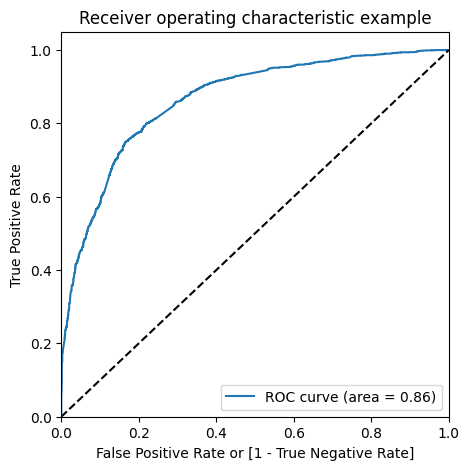

In [272]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [273]:
# Let's create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.726002          1    1    1    1    1    1    1    1   
1          1         0.640567          1    1    1    1    1    1    1    1   
2          1         0.381126          0    1    1    1    1    0    0    0   
3          0         0.119903          0    1    1    0    0    0    0    0   
4          0         0.122641          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  
0    1    0    0  
1    0    0    0  
2    0    0    0  
3    0    0    0  
4    0    0    0

In [274]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.480045  1.000000  0.000000
0.1   0.1  0.573543  0.986455  0.192324
0.2   0.2  0.693498  0.951425  0.455369
0.3   0.3  0.764126  0.898178  0.640362
0.4   0.4  0.787668  0.803830  0.772747
0.5   0.5  0.791031  0.738440  0.839586
0.6   0.6  0.775112  0.669780  0.872359
0.7   0.7  0.739462  0.549743  0.914618
0.8   0.8  0.708520  0.443251  0.953428
0.9   0.9  0.639910  0.267632  0.983614


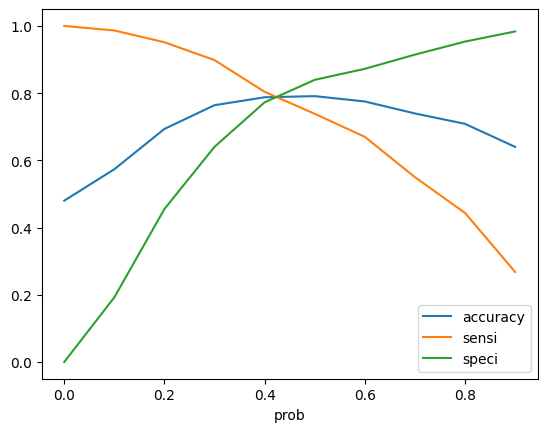

In [275]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [276]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.726002          1    1    1    1    1    1    1    1   
1          1         0.640567          1    1    1    1    1    1    1    1   
2          1         0.381126          0    1    1    1    1    0    0    0   
3          0         0.119903          0    1    1    0    0    0    0    0   
4          0         0.122641          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    1    0    0                1  
1    0    0    0                1  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [277]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7876681614349775

In [278]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion2)

[[1947  372]
 [ 560 1581]]


In [279]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [280]:
# Calculate Sensitivity

TP/(TP+FN)

0.7384399813171415

In [281]:
# Calculate Specificity

TN/(TN+FP)

0.8395860284605433

This cutoff point seems good to go!

In [282]:
from sklearn.metrics import precision_score, recall_score

In [283]:
print("Precision Score: ",precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted))
print("Recall Score: ",recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision Score:  0.7763888888888889
Recall Score:  0.7832788416627744


In [284]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

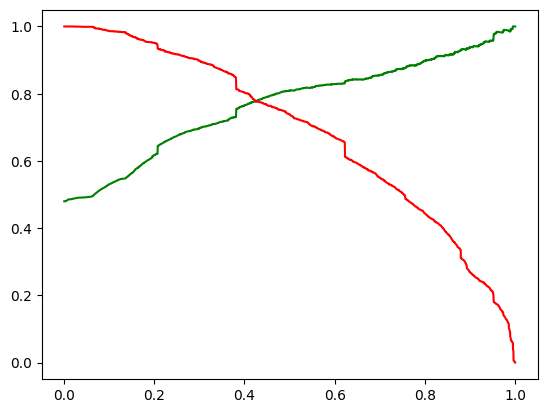

In [285]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [286]:
X_test.describe()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
count  1912.000000                  1912.000000           1912.000000   
mean      3.491632                   538.555962              2.482374   
std       3.731425                   569.578862              2.355667   
min       0.000000                     0.000000              0.000000   
25%       2.000000                    36.750000              1.000000   
50%       3.000000                   287.500000              2.000000   
75%       5.000000                  1020.000000              3.000000   
max      55.000000                  2253.000000             55.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          1912.000000                1912.000000   
mean                              0.580021                   0.086820   
std                               0.493684                   0.281645   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

       Lead Origin_Lead Import  Lead Source_Direct Traffic  \
count              1912.000000                 1912.000000   
mean                  0.005753                    0.307008   
std                   0.075651                    0.461374   
min                   0.000000                    0.000000   
25%                   0.000000                    0.000000   
50%                   0.000000                    0.000000   
75%                   0.000000                    1.000000   
max                   1.000000                    1.000000   

       Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
count           1912.000000         1912.000000                 1912.0  ...   
mean               0.005753            0.314331                    0.0  ...   
std                0.075651            0.464370                    0.0  ...   
min                0.000000            0.000000                    0.0  ...   
25%                0.000000            0.000000                    0.0  ...   
50%                0.000000            0.000000                    0.0  ...   
75%                0.000000            1.000000                    0.0  ...   
max                1.000000            1.000000                    0.0  ...   

       Specialization_IT Projects Management  \
count                            1912.000000   
mean                                0.043410   
std                                 0.203832   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Specialization_International Business  \
count                            1912.000000   
mean                                0.018305   
std                                 0.134089   
min                                 0.000000   
25%                                 0.000000   
50%                                 0.000000   
75%                                 0.000000   
max                                 1.000000   

       Specialization_Marketing Management  \
count                          1912.000000   
mean                              0.095188   
std                               0.293552   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                               1.000000   

       Specialization_Media and Advertising  \
count                           1912.000000   
mean                               0.029289  

In [287]:
# Get the numerical columns used during fitting
fitting_cols = scaler.feature_names_in_

# Ensure X_test has the same numerical features and order as fitting data
X_test_numeric = X_test[fitting_cols]

# Transform the numerical features in X_test
X_test[fitting_cols] = scaler.transform(X_test_numeric)
X_test.head()

TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
8402    -0.314889                     1.558072             -0.229986   
8782     0.255544                     0.044581              1.212351   
6199    -0.124745                     0.724144             -0.470376   
6482    -0.695177                    -0.947262             -1.191544   
6026    -0.695177                    -0.947262             -1.191544   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
8402                                    0                          0   
8782                                    0                          0   
6199                                    1                          0   
6482                                    0                          0   
6026                                    0                          1   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
8402                        0                           0   
8782                        0                           1   
6199                        0                           1   
6482                        0                           0   
6026                        0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  ...  \
8402                     0                   1                      0  ...   
8782                     0                   0                      0  ...   
6199                     0                   0                      0  ...   
6482                     0                   0                      0  ...   
6026                     0                   0                      0  ...   

      Specialization_IT Projects Management  \
8402                                      0   
8782                                      0   
6199                                      0   
6482                                      0   
6026                                      0   

      Specialization_International Business  \
8402                                      0   
8782                                      0   
6199                                      0   
6482                                      0   
6026                                      0   

      Specialization_Marketing Management  \
8402                                    0   
8782                                    0   
6199                                    0   
6482                                    0   
6026                                    0   

      Specialization_Media and Advertising  \
8402                                     0   
8782                                     0   
6199                                     0   
6482                                     0   
6026                                     0   

      Specialization_Operations Management  Specialization_Retail Management  \
8402                                     0                                 0   
8782                                     0                                 0   
6199                                     0                                 0   
6482                                     0                                 0   
6026                                     0                                 0   

      Specialization_Rural and Agribusiness  \
8402                                      0   
8782                                      0   
6199                                      0   
6482                                      0   
6026                                      0   

      Specialization_Services Excellence  \
8402                                   0   
8782                                   0   
6199                                   0   
6482                                   0   
6026                                   0   

      Specialization_Supply Chain Management  \
8402                                       0   
8782                                       0   
6199             

In [288]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Olark Chat  \
8402                     1.558072                       0   
8782                     0.044581                       0   
6199                     0.724144                       0   
6482                    -0.947262                       1   
6026                    -0.947262                       0   

      Lead Source_Reference  Lead Source_Welingak Website  Do Not Email_Yes  \
8402                      0                             0                 0   
8782                      0                             0                 0   
6199                      0                             0                 0   
6482                      0                             0                 0   
6026                      1                             0                 0   

      Last Activity_Email Bounced  Last Activity_Had a Phone Conversation  \
8402                            0                                       0   
8782                            0                                       0   
6199                            0                                       0   
6482                            0                                       0   
6026                            0                                       0   

      Last Activity_SMS Sent  What is your current occupation_Student  \
8402                       0                                        0   
8782                       0                                        0   
6199                       1                                        0   
6482                       0                                        0   
6026                       0                                        0   

      What is your current occupation_Unemployed  \
8402                                           1   
8782                                           1   
6199                                           1   
6482                                           1   
6026                                           1   

      Last Notable Activity_Email Bounced  Last Notable Activity_Modified  \
8402                                    0                               1   
8782                                    0                               1   
6199                                    0                               0   
6482                                    0                               0   
6026                                    0                               0   

      Last Notable Activity_Unreachable  Specialization_Services Excellence  
8402                                  0                                   0  
8782                                  0                                   0  
6199                                  0                                   0  
6482                                  0                                   0  
6026                                  0                                   0

In [289]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [290]:
# Check X_test_sm

X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable',
       'Specialization_Services Excellence'],
      dtype='object')

In [291]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [292]:
y_test_pred[:10]

8402    0.522429
8782    0.168529
6199    0.731083
6482    0.381126
6026    0.879014
5991    0.351463
3812    0.457788
6307    0.176122
7344    0.745215
4171    0.072646
dtype: float64

In [293]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [294]:
# Let's see the head

y_pred_1.head()

0
8402  0.522429
8782  0.168529
6199  0.731083
6482  0.381126
6026  0.879014

In [295]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [296]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [297]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [298]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.522429
1          0  0.168529
2          1  0.731083
3          1  0.381126
4          1  0.879014

In [299]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [300]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.522429
1          0         0.168529
2          1         0.731083
3          1         0.381126
4          1         0.879014

In [301]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [302]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.522429                1
1          0         0.168529                0
2          1         0.731083                1
3          1         0.381126                0
4          1         0.879014                1

In [303]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7934100418410042

In [304]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[786, 202],
       [193, 731]])

In [305]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [306]:
# Calculate sensitivity
TP / float(TP+FN)

0.7911255411255411

In [307]:
# Calculate specificity
TN / float(TN+FP)

0.7955465587044535

## Precision-Recall View

Let's now also build the training model using the precision-recall view

In [308]:
#Looking at the confusion matrix again

In [309]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1947,  372],
       [ 560, 1581]])

##### Precision
TP / TP + FP

In [310]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8095238095238095

##### Recall
TP / TP + FN

In [311]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7384399813171415

### Precision and recall tradeoff

In [312]:
from sklearn.metrics import precision_recall_curve

In [313]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       1
 2       1
 3       0
 4       0
        ..
 4455    0
 4456    0
 4457    0
 4458    0
 4459    1
 Name: Converted, Length: 4460, dtype: int64,
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 4455    0
 4456    1
 4457    0
 4458    0
 4459    0
 Name: Predicted, Length: 4460, dtype: int64)

In [314]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

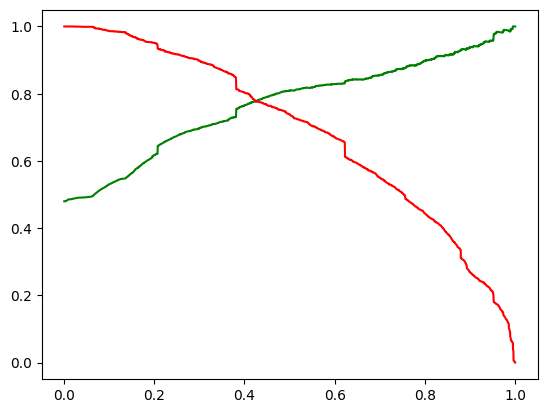

In [315]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [316]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          1         0.726002          1    1    1    1    1    1    1    1   
1          1         0.640567          1    1    1    1    1    1    1    1   
2          1         0.381126          0    1    1    1    1    0    0    0   
3          0         0.119903          0    1    1    0    0    0    0    0   
4          0         0.122641          0    1    1    0    0    0    0    0   

   0.7  0.8  0.9  final_predicted  
0    1    0    0                1  
1    0    0    0                1  
2    0    0    0                0  
3    0    0    0                0  
4    0    0    0                0

In [317]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7876681614349775

In [318]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1836,  483],
       [ 464, 1677]])

In [319]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [320]:
# Calculate Precision

TP/(TP+FP)

0.7763888888888889

In [321]:
# Calculate Recall /Sensitivity

TP/(TP+FN)

0.7832788416627744

In [322]:
#calculate Specificity
TN/(TN+FP)

0.7917205692108668

This cutoff point seems good to go!

## Step 4: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [323]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [324]:
y_test_pred[:10]

8402    0.522429
8782    0.168529
6199    0.731083
6482    0.381126
6026    0.879014
5991    0.351463
3812    0.457788
6307    0.176122
7344    0.745215
4171    0.072646
dtype: float64

In [325]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [326]:
# Let's see the head

y_pred_1.head()

0
8402  0.522429
8782  0.168529
6199  0.731083
6482  0.381126
6026  0.879014

In [327]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [328]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [329]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [330]:
# Check 'y_pred_final'

y_pred_final.head()

Converted         0
0          1  0.522429
1          0  0.168529
2          1  0.731083
3          1  0.381126
4          1  0.879014

In [331]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [332]:
# Let's see the head of y_pred_final

y_pred_final.head()

Converted  Conversion_Prob
0          1         0.522429
1          0         0.168529
2          1         0.731083
3          1         0.381126
4          1         0.879014

In [333]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [334]:
# Check y_pred_final

y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          1         0.522429                1
1          0         0.168529                0
2          1         0.731083                1
3          1         0.381126                0
4          1         0.879014                1

In [335]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7897489539748954

In [336]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[796, 192],
       [210, 714]])

In [337]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [338]:
# Calculate Precision

TP/(TP+FP)

0.7880794701986755

In [339]:
# Calculate Recall

TP/(TP+FN)

0.7727272727272727

In [340]:
# Calculate Specificity
TN/(TN+FP)

0.805668016194332


##Final Conclusion:

Let us compare the values obtained for Train & Test:

Train Data:

*   Accuracy: 	 78.76%
*   Sensitivity: 78.32%
*   Specificity: 79.17%
*   Precision:	 77.63%

Test Data:

*   Accuracy: 	 78.97%
*   Sensitivity: 77.27%
*   Specificity: 80.56%
*   Precision:	 78.80%


The Model seems to predict the Conversion Rate quite satisfactorily and we should be able to give the CEO confidence in making good calls based on this model